In [2]:
import pandas as pd

df = pd.read_csv("network_traffic_data.csv")
print(df.head())


    Duration Protocol       SourceIP  DestinationIP  SourcePort  \
0  24.077749      TCP  192.168.1.239  192.168.1.234        8055   
1  97.252384     ICMP  192.168.1.176   192.168.1.82       63174   
2  85.842654      TCP  192.168.1.120  192.168.1.113       30873   
3  79.196991      UDP  192.168.1.212  192.168.1.140        4410   
4  34.928018      TCP   192.168.1.17  192.168.1.223        4702   

   DestinationPort  PacketCount  ByteCount   Label  
0                1          827     198244  Attack  
1              687          673    1202973  Normal  
2              570          319     984671  Attack  
3              683          375      36284  Normal  
4              989          465     817463  Normal  


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.5225
Final Accuracy: 0.49
              precision    recall  f1-score   support

      Attack       0.51      0.53      0.52       209
      Normal       0.46      0.45      0.46       191

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



 99%|===================| 789/800 [00:51<00:00]        

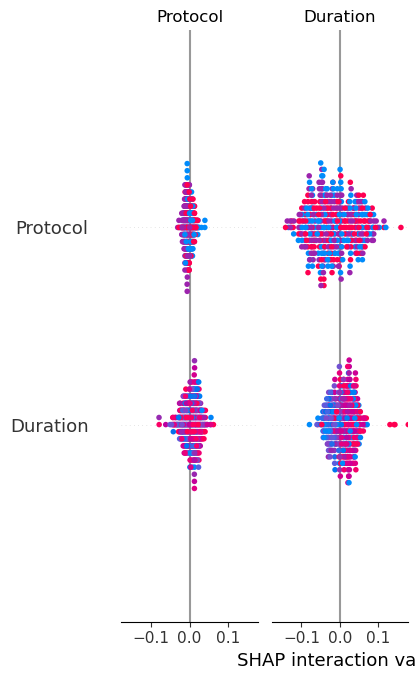

In [3]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ['Protocol', 'SourceIP', 'DestinationIP']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Final model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# SHAP explainability
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [4]:
import joblib

# Save the final model
joblib.dump(best_model, "NetworkTraffic_rf_best_model.pkl")
print("Model saved as rf_best_model.pkl")

Model saved as rf_best_model.pkl


In [5]:
joblib.dump(label_encoder, "NetworkTraffic_rf_label_encoder.pkl")


['NetworkTraffic_rf_label_encoder.pkl']


Training SVM model...
SVM saved as NetworkTraffic_svm_model.pkl
Final Accuracy of SVM: 0.5375
              precision    recall  f1-score   support

      Attack       0.55      0.65      0.59       209
      Normal       0.52      0.42      0.46       191

    accuracy                           0.54       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.54      0.53       400



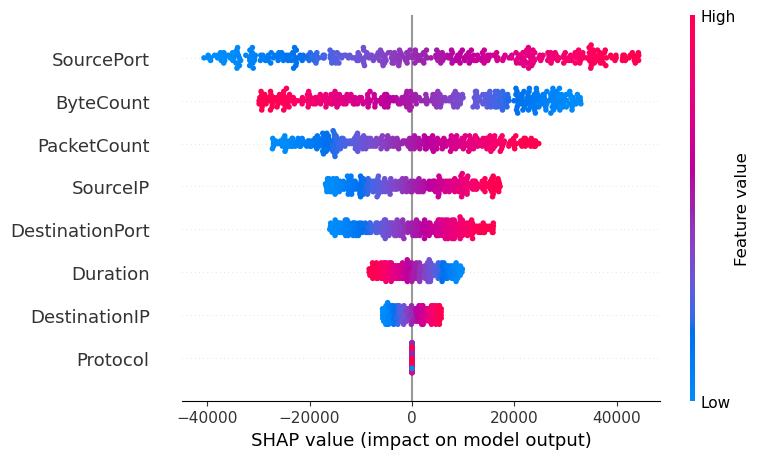


Training Logistic Regression model...
Logistic Regression saved as NetworkTraffic_logistic_regression_model.pkl
Final Accuracy of Logistic Regression: 0.5
              precision    recall  f1-score   support

      Attack       0.52      0.50      0.51       209
      Normal       0.48      0.50      0.49       191

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


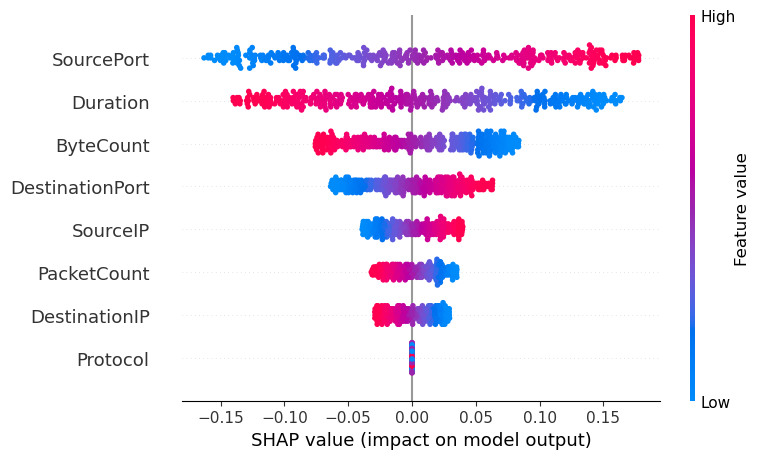


Training Perceptron model...
Perceptron saved as NetworkTraffic_perceptron_model.pkl
Final Accuracy of Perceptron: 0.51
              precision    recall  f1-score   support

      Attack       0.52      0.95      0.67       209
      Normal       0.33      0.03      0.05       191

    accuracy                           0.51       400
   macro avg       0.43      0.49      0.36       400
weighted avg       0.43      0.51      0.37       400



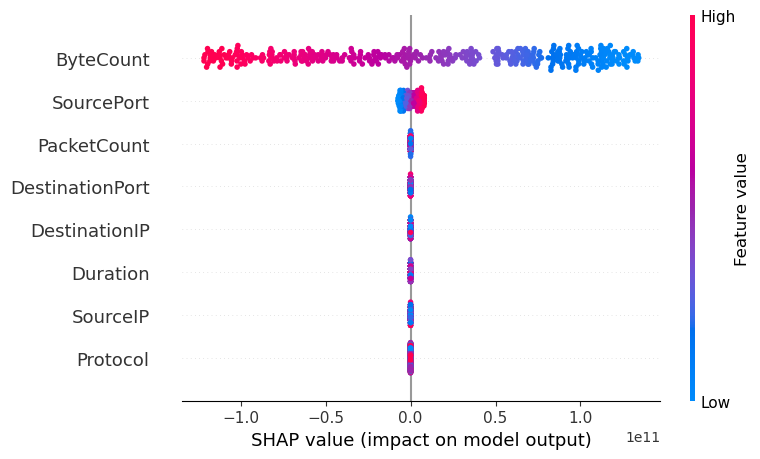

In [6]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("network_traffic_data.csv")
# Encode categorical columns
categorical_columns = ['Protocol', 'SourceIP', 'DestinationIP']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Features and target
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Perceptron': Perceptron(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining {name} model...")
    model.fit(X_train, y_train)
    best_model = model
    y_pred = best_model.predict(X_test)

    # Save the trained model with custom name
    filename = f"NetworkTraffic_{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"{name} saved as {filename}")
    
    print(f"Final Accuracy of {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    
    explainer = shap.Explainer(best_model, X_train)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
